In [1]:
# filter.py
import argparse
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

In [2]:
def selectFilter(img, task):
    if (task == 1):
        return filter1(img)
    elif (task == 2):
        return filter2(img)
    elif (task == 3):
        return filter3(img)
    elif (task == 4):
        return filter4(img)
    elif (task == 5):
        return filter5(img)

def process_img1(imgfile, task):
    print 'Opening ', imgfile
    img = cv2.imread(imgfile)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # You should implement your functionality in filter function
    filtered_img = selectFilter(img, task)

    cv2.imshow('Input image',img)
    cv2.imshow('Filtered image',filtered_img)

    print 'Press any key to proceed'   
    cv2.waitKey(0)
    cv2.destroyAllWindows()


def process_img2(imgfile, task):
    print 'Opening ', imgfile
    img = cv2.imread(imgfile)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # You should implement your functionality in filter function
    filtered_img = selectFilter(img, task)

    # You should implement your functionality in filter function
    plt.figure(figsize=(11,15))
    
    plt.subplot(121)
    plt.imshow(img)
    plt.title('Input image')
    plt.xticks([]), plt.yticks([])

    plt.subplot(122)
    plt.imshow(filtered_img, cmap = 'gray')
    plt.title('Filtered image')
    plt.xticks([]), plt.yticks([])

    plt.show()

# Task 1

Opening  test.jpg


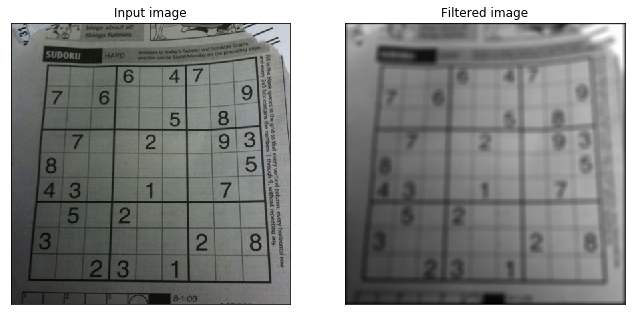

In [42]:
def filter1(img):
    # Complete this method according to the tasks listed in the lab handout. 
    # task 1
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    n = 111
    mean =  np.array([0, 0])
    mean = mean.reshape(2,1)
    cov = np.array([[20,0],[0,20]])
    g2d_kernel, xc, yc = gaussian2_n(mean, cov, 11)
    g2d_kernel_normalized = g2d_kernel / np.sum(g2d_kernel)
    img = signal.convolve2d(img, g2d_kernel_normalized, mode='same', boundary='fill')  
    
    return img

def gaussian2_xy(mean, cov, xy):
    invcov = np.linalg.inv(cov)
    results = np.ones([xy.shape[0], xy.shape[1]])
    for x in range(0, xy.shape[0]):
        for y in range(0, xy.shape[1]):
            v = xy[x,y,:].reshape(2,1) - mean
            results[x,y] = np.dot(np.dot(np.transpose(v), invcov), v)
    results = np.exp( - results / 2 )
    return results 

def gaussian2_n(mean, cov, n):
    s = int(n/2)
    x = np.linspace(-s,s,n)
    y = np.linspace(-s,s,n)
    xc, yc = np.meshgrid(x, y)
    xy = np.zeros([n, n, 2])
    xy[:,:,0] = xc
    xy[:,:,1] = yc

    return gaussian2_xy(mean, cov, xy), xc, yc

if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='CSCI 4220U Lab 2.')
    parser.add_argument('--use-plotlib', action='store_true', help='If specified uses matplotlib for displaying images.')
    parser.add_argument('--task', action='store', type=int)
    parser.add_argument('imgfile', help='Image file')
    args = parser.parse_args(['--use-plotlib', '--task=1','test.jpg'])
    
    if args.use_plotlib:
        process_img2(args.imgfile, args.task)
    else:
        process_img1(args.imgfile, args.task) 

# Task 2

Opening  test.jpg


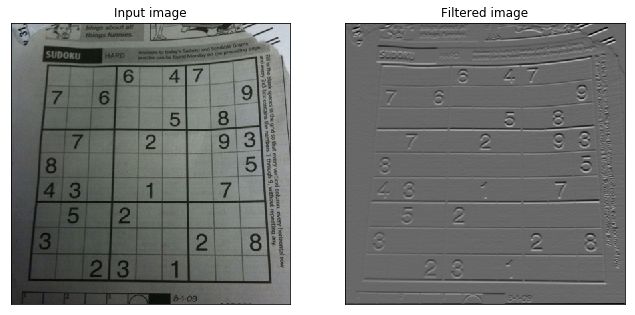

In [43]:
def filter2(img):
    # Complete this method according to the tasks listed in the lab handout. 
    # task 2
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobel_x = np.array([[1,2,1], [0,0,0], [-1,-2,-1]], dtype='float32')
    img = signal.convolve2d(img, sobel_x, mode='same')
    
    return img

if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='CSCI 4220U Lab 2.')
    parser.add_argument('--use-plotlib', action='store_true', help='If specified uses matplotlib for displaying images.')
    parser.add_argument('--task', action='store', type=int)
    parser.add_argument('imgfile', help='Image file')
    args = parser.parse_args(['--use-plotlib', '--task=2','test.jpg'])
    
    if args.use_plotlib:
        process_img2(args.imgfile, args.task)
    else:
        process_img1(args.imgfile, args.task) 

# Task 3

Opening  test.jpg


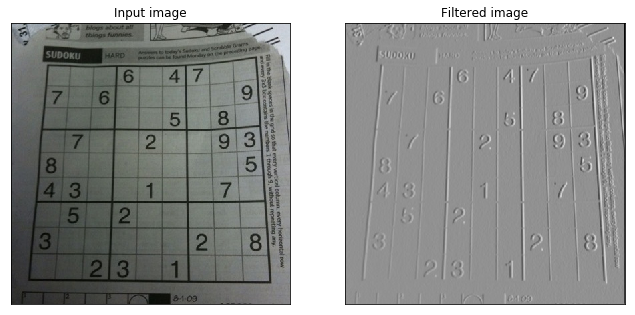

In [44]:
def filter3(img):
    # Complete this method according to the tasks listed in the lab handout. 
    # task 3
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobel_y = np.array([[1,0,-1], [2,0,-2], [1,0,-1]], dtype='float32')
    img = signal.convolve2d(img, sobel_y, mode='same')
    
    return img

if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='CSCI 4220U Lab 2.')
    parser.add_argument('--use-plotlib', action='store_true', help='If specified uses matplotlib for displaying images.')
    parser.add_argument('--task', action='store', type=int)
    parser.add_argument('imgfile', help='Image file')
    args = parser.parse_args(['--use-plotlib', '--task=3','test.jpg'])
    
    if args.use_plotlib:
        process_img2(args.imgfile, args.task)
    else:
        process_img1(args.imgfile, args.task) 

# Task 4

Opening  test.jpg


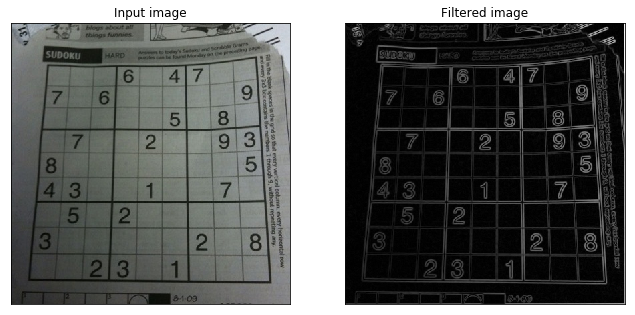

In [45]:
def filter4(img):
    # Complete this method according to the tasks listed in the lab handout. 
    # task 4
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    

    sobel_x = np.array([[1,2,1], [0,0,0], [-1,-2,-1]], dtype='float32')
    sobel_y = np.array([[1,0,-1], [2,0,-2], [1,0,-1]], dtype='float32')

    img_x = signal.convolve2d(img, sobel_x, mode='same')
    img_y = signal.convolve2d(img, sobel_y, mode='same')
    
    img = np.sqrt((np.square(img_x) + np.square(img_y)))
    
    return img

if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='CSCI 4220U Lab 2.')
    parser.add_argument('--use-plotlib', action='store_true', help='If specified uses matplotlib for displaying images.')
    parser.add_argument('--task', action='store', type=int)
    parser.add_argument('imgfile', help='Image file')
    args = parser.parse_args(['--use-plotlib', '--task=4','test.jpg'])
    
    if args.use_plotlib:
        process_img2(args.imgfile, args.task)
    else:
        process_img1(args.imgfile, args.task) 

# Task 5

Opening  test.jpg


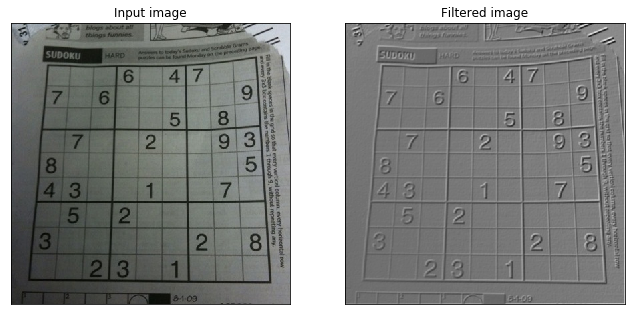

In [46]:
def filter5(img):
    # Complete this method according to the tasks listed in the lab handout. 
    # task 2
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    avg = np.array([[-2, -1, 0], [-1,1,1], [0,1,2]], dtype='float32')
    img = signal.convolve2d(img, avg, mode='same')

    return img

if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='CSCI 4220U Lab 2.')
    parser.add_argument('--use-plotlib', action='store_true', help='If specified uses matplotlib for displaying images.')
    parser.add_argument('--task', action='store', type=int)
    parser.add_argument('imgfile', help='Image file')
    args = parser.parse_args(['--use-plotlib', '--task=5','test.jpg'])
    
    if args.use_plotlib:
        process_img2(args.imgfile, args.task)
    else:
        process_img1(args.imgfile, args.task) 